In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed, FloatSlider, IntSlider, Dropdown, HBox, VBox, Checkbox
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,array,arange,linspace,meshgrid

from ipykernel.pylab.backend_inline import flush_figures

from scipy.integrate import quad, dblquad, tplquad

%matplotlib widget

plt.rcParams.update({
    "figure.figsize": (6,6),
    "text.usetex": True,
    "font.family": "serif",
})

# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('default')
# plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


In [2]:
%%html

<style>
.shadow {

    /*Edit or add new attributes, change size, color, etc */
    width: 75%;
    box-shadow: 8px 8px 10px #444;
    border: 1px solid silver;

    /*For positioning in a jupyter notebook*/
    margin-top: 2em;
    position: relative;
    top: -25px
}

ol li {
    padding: .5em;
}

th, td {
    font-size: large;
}
</style>

## Review Example

A spherical shell 2 cm in radius has density the square of the distance to the top pole (in g/cm$^2$). Write down an integral to compute its total mass. 

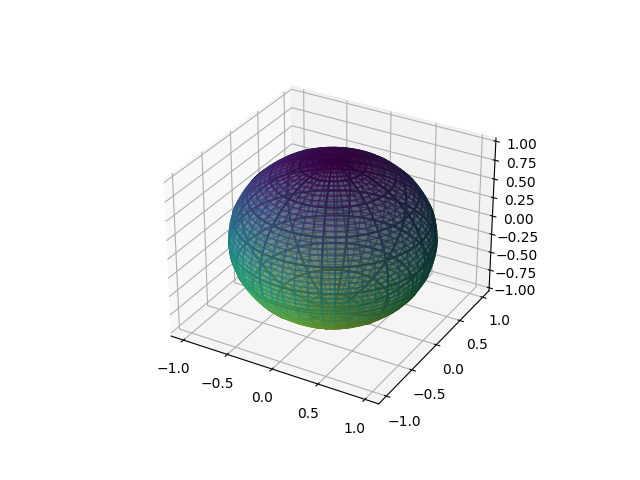

In [3]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    
    ax = fig.add_subplot(projection='3d')
    
    u = np.linspace(0,pi,50)
    v = np.linspace(0,2*pi,50)
    U,V = np.meshgrid(u,v)
    mc = cm.viridis((2-2*cos(U))/4)
    ax.plot_surface(sin(U)*cos(V),sin(U)*sin(V),cos(U),alpha=.5,facecolors=mc,zorder=-1)
    ax.plot_wireframe(sin(U)*cos(V), sin(U)*sin(V), cos(U), alpha=1,color='k',rcount=10,ccount=10,zorder=3);
    
    return fig.canvas

a("A Sphere")


#### Solution

We put the coordinate axes at the center. The density is thus $\rho(x,y,z) = x^2 + y^2 +(2-z)^2 = x^2 + y^2 + z^2 -2z + 4$. 

Parametrize the sphere as $$\vec r(u,v) = \begin{bmatrix} 2\sin u \cos v \\ 2 \sin u \sin v \\ 2 \cos u \\ \end{bmatrix}$$ for $0 \leq u \leq \pi, 0 \leq v \leq 2\pi$, which gives the familiar

$$|\vec r_u\times \vec r_v| = 4\sin u.$$

We compute $\rho(\vec r(u,v)) = 8 - 8\cos(u)$ to get 

$$\text{mass} = \iint_\Omega \rho\, dS = \int_0^\pi \int_0^{2\pi} (8-8\cos u)4\sin u \,dv\,du = 128\pi$$ 


####
<p style="padding-bottom:40%;"> </p>

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


# Lecture 21

## Flux Integrals and Curl and Div

  - Objectives
    - Compute surface integrals
      - of a scalar field w/r/t surface area
      - of a vector field (flux integrals)
    - Curl and Divergence
      - in the plane, via Green's
      - formulas in $\RR^3$
      - $\nabla$ notation
      

  - Resources
    - Content
      - Stewart: §16.5–6
      - New Strang:  
        - [§6.5](https://openstax.org/books/calculus-volume-3/pages/6-5-divergence-and-curl) [§6.6](https://openstax.org/books/calculus-volume-3/pages/6-6-surface-integrals) 
      - [3Demos](https://drew.youngren.nyc/3Demos/surfint/index.html)
      - Mooculus: [Surface Integrals](https://ximera.osu.edu/mooculus/calculus3/shapeOfThingsToCome/digInSurfaceIntegrals) [Divergence Theorem](https://ximera.osu.edu/mooculus/calculus3/shapeOfThingsToCome/digInDivergenceTheorem)
    - Extras 
      - CalcBLUE: [2-Form Fields](https://www.youtube.com/watch?v=LNaAEy_K-Cg&list=PL8erL0pXF3JYCn8Xukv0DqVIXtXJbOqdo&index=64) *Use with caution. This is a different and more general formulation of surface integrals. 

<p style="padding-bottom:40%;"> </p>

<p style="padding-bottom:40%;"> </p>

<p style="padding-bottom:40%;"> </p>

<div class="alert alert-block alert-info shadow"> 

<h2>Orientation</h2>
    
A surface $\Omega$ is <strong>oriented</strong> if there is a continuous choice of unit normal vector $\vec N$ at each point of the surface.
    
</div>

That is, there is a chosen "direction" through the surface. 

Practically speaking, we arrange the parametrization $\vec r(u,v)$ such that $\vec r_u\times \vec r_v$ points in the direction of $\vec N$. 

<p style="padding-bottom:40%;"> </p>

### Common examples

  - Orient the graph of a function "upward".
   
$$\vec r(u,v) = u \,\vec i + v \,\vec j + (1-u^2) \,\vec k $$ 

for $-1\leq u,v \leq 1$.
  

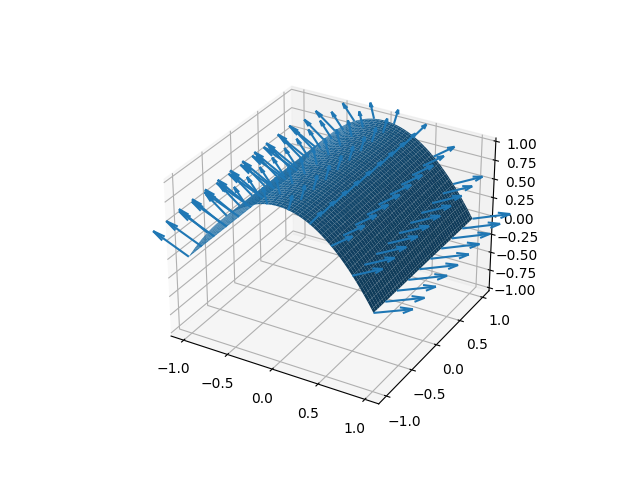

In [4]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    
    ax = fig.add_subplot(projection='3d')
    
    u = v = np.linspace(-1,1,100)

    U,V = np.meshgrid(u,v)
    ax.plot_surface(U,V,1-U**2)
    u = v = np.linspace(-1,1,10)
    U,V = np.meshgrid(u,v)
    ax.set_zlim((-1,1))
    ax.quiver(U,V,1-U**2,2*U,0,1,length=.2);
    
    return fig.canvas

a("An Oriented Graph")




<p style="padding-bottom:40%;"> </p>

### Common examples

  - Orient a surface of revolution "outward".
   
$$\vec r(u,v) = (1+u)\cos v \,\vec i + u \,\vec j + (1+u)\sin v \,\vec k $$ 

for $-1\leq u \leq 1, 0 \leq v \leq 2\pi$.
  

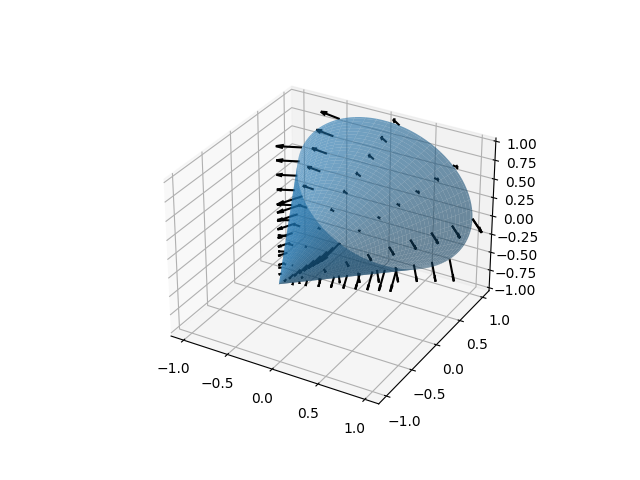

In [5]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    
    ax = fig.add_subplot(projection='3d')
    
    u = np.linspace(-1,1,100)
    v = np.linspace(0,2*pi,100) 
   
    U,V = np.meshgrid(u,v)
    ax.plot_surface((1+U)/2*cos(V),U,(1+U)/2*sin(V),alpha=.6)
    u = np.linspace(-1,1,10)
    v = np.linspace(0,2*pi,10) 
    U,V = np.meshgrid(u,v)
    ax.set_zlim((-1,1))
    ax.quiver((1+U)/2*cos(V),U,(1+U)*sin(V)/2,(1+U)/2*cos(V),-1/2-U/2,(1+U)/2*sin(V),length=.2,color='k');
    
    return fig.canvas

a("An Oriented Surface of Revolution")

<p style="padding-bottom:40%;"> </p>

### Nonorientable

  - Some strange surfaces, like the _[Möbius strip](https://drew.youngren.nyc/3Demos/surfint/?a=-1&b=1&c=0&d=pi*2&x=%281+%2B+%28u%2F3%29+*+cos%28v%2F2%29%29*cos%28v%29&y=%281+%2B+u%2F3+*+cos%28v%2F2%29%29*sin%28v%29&z=%28u%2F3+*+sin%28v%2F2%29%29+%2B+1%2F2&P=x%2F4&Q=y%2F4&R=-z%2F4&E=x%5E2+%2B+y%5E2&divergence=false&curl=false&colorFunc=false&surfaceVisible=true&tanFrameVisible=true&trailsVisible=false&S=revolutions&nX=30&rNum=10&cNum=10&shards=0&nVec=5)_, cannot be oriented
   
$$\vec r(u,v) = \begin{bmatrix}
\cos v + u/3 \cos(v/2) \cos(v) \\ \sin v + u/3\cos(v/2)\sin(v)  \\ u/3\sin(v/2) 
\end{bmatrix}$$ 

for $-1\leq u \leq 1, 0 \leq v \leq 2\pi$.
  

In [6]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    
    ax = fig.add_subplot(projection='3d')
    
    u = np.linspace(-1,1,5)
    v = np.linspace(0,2*pi,50) 

    U,V = np.meshgrid(u,v)
    ax.plot_surface(1*cos(V)+U/3*cos(V/2)*cos(V),1*sin(V) + U/3*cos(V/2)*sin(V), U/3*sin(V/2),alpha=.6)
    u = np.linspace(-1,1,10)
#     v = np.linspace(0,2*pi,10) 
#     U,V = np.meshgrid(u,v)
    ax.set_zlim((-4/3,4/3))
    
    slider=FloatSlider(min=0, max=4*pi, step=pi/100)
    t = slider.value
    
    def update(change):
        while len(ax.collections) > 1:
            ax.collections.pop();
        t = slider.value
        ax.quiver(1*cos(t)+U/3*cos(t/2)*cos(t),1*sin(t) + U/3*cos(t/2)*sin(t), U/3*sin(t/2), 
              U*sin(t)/18 - U*sin(2*t)/36 + sin(t/2)/6 - sin(3*t/2)/6,
              U*sin(t/2)**2*cos(t)/18 - U*sin(t)**2/12 - U*cos(t)/12 + U/36 - cos(t/2)/6 + cos(3*t/2)/6,
              (U*cos(t/2) + 3)*cos(t/2)/9,length=.5,color='k');
    
    slider.observe(update, names='value')
    update({})
    
    return VBox([slider,fig.canvas])

a("A Nonorientable Surface")




<p style="padding-bottom:40%;"> </p>

# Flux Integrals

A **flux integral** of a vector field $\vec F$ through a surface $\Omega$ (somethimes just the "surface integral of a vector field") with orientation $\vec N$ corresponding to parametrization $\vec r:\mathcal D \to \RR^3$ is 

$$\iint_\Omega \vec F\cdot d\vec S = \iint_\Omega \vec F \cdot \vec N\,dS$$

  - **Where?** on a 2D surface $\Omega$ in $\RR^3$.

  - **What?** a vector field $\vec F$.

  - **How?** In the (positive) direction perpendicular to the surface.

<p style="padding-bottom:40%;"> </p>

$$= \iint_D \vec F(\vec r(u,v))\cdot \frac{r_u\times \vec r_v}{|\vec r_u \times \vec r_v|} |\vec r_u \times \vec r_v|\,dA $$

$$= \iint_D \vec F(\vec r(u,v))\cdot \vec r_u\times \vec r_v\,dA $$

That integrand $\vec F(\vec r(u,v))\cdot \vec r_u\times \vec r_v$ is a triple-product, or, rather, a volume of a parallelopiped, two sides defined by the surface, and one by the vector field.  

In [7]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE, figsize=(8, 8))
    plt.ion()
    
    ax = fig.add_subplot(projection='3d')
    
    F= lambda x,y,z: 1/3*np.array([1+x,1+y,1])
    
    r= lambda u,v: np.array([u,v+u/4,1/2-u**2/10-v**2/10])
    ru= lambda u,v: np.array([1,1/4,-u*2/10])
    rv= lambda u,v: np.array([0,1,-v*2/10])
    
    slider = IntSlider(min=1, max=4)
    level = slider.value
    
    u = v = np.linspace(0,1,100)
    
    U,V = np.meshgrid(u,v)
    ax.plot_surface(*r(U,V),alpha=.6)

    for ch in "xyz": 
        getattr(ax,f"set_{ch}lim")((0,1))    

    U,V = np.meshgrid([0,1],[0,1])


    
    pl = [ax.plot([],[],[], 'g--')[0] for _ in range(7)]
    # print(pl, len(pl), help(ax.plot))
        
    def update(change):
        
        while len(ax.collections) > 1:
            ax.collections.pop()
        
        level = slider.value
        

    
        for pt in [(i,j) for i in np.arange(0,1,1/level) for j in np.arange(0,1,1/level)]:
            x = r(*pt)
            a = ru(*pt)
            b = rv(*pt)
            c = 0*np.cross(a,b)
            ax.plot_surface((r(*pt)[0] + U/level*(ru(*pt)[0]) + V/level*(rv(*pt)[0])),
                            (r(*pt)[1] + U/level*(ru(*pt)[1]) + V/level*(rv(*pt)[1])),
                            (r(*pt)[2] + U/level*(ru(*pt)[2]) + V/level*(rv(*pt)[2])),alpha=.6,color='r')
            ax.quiver(r(*pt)[0]*np.ones(3),r(*pt)[1]*np.ones(3),r(*pt)[2]*np.ones(3),
                      [a[0],b[0],c[0]],[a[1],b[1],c[1]],[a[2],b[2],c[2]],length=1/level,color='k');
            ax.quiver(r(*pt)[0],r(*pt)[1],r(*pt)[2],
                      F(*r(*pt))[0],F(*r(*pt))[1],F(*r(*pt))[2],length=1,color='b');
        x = r(0,0)
        a = ru(0,0)
        b = rv(0,0)
        c = F(*r(0,0))
        
        for i, (v1,v2) in enumerate([[(x+(a+b)/level),(x+(a+b)/level+c)],
                 [(x+(a)/level),(x+(a)/level+c)],
                 [(x+(b)/level),(x+(b)/level+c)],
                 [(x+(a)/level+c),(x+(a+b)/level+c)],
                 [(x+(b)/level+c),(x+(a+b)/level+c)],
                 [(x+(a)/level+c),(x+c)],
                 [(x+(b)/level+c),(x+c)]]):
            pl[i].set_data_3d([v1[0],v2[0]],
                    [v1[1],v2[1]],
                    [v1[2],v2[2]])
    
    slider.observe(update, names='value')
    update({})
    
    return VBox([slider, fig.canvas])

a("A Flux Sum")




<p style="padding-bottom:40%;"> </p>

### Example

Consider the constant vector field $\vec F(x,y,z) = \vec i$. Consider the surfaces

  - $\Omega_1$: piece of the plane $y=0$ for $0 \leq x,z \leq 1$
  - $\Omega_2$: piece of the plane $x= 0$ for $0 \leq y,z \leq 1$

oriented in the positive $x$-direction. Through which surface is the flux of $\vec F$ greater?

In [8]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    
    ax = fig.add_subplot(projection='3d')
    


    u = v = np.linspace(0,1,7)
    # v = np.linspace(0,2*pi,10)
    U,V,W = np.meshgrid(u,v,u)
    ax.quiver(U,V,W,np.ones_like(U),0*U,0*U,length=.2);
    
    slider=FloatSlider(min=0, max=1, step=1/100)
    
    def update(change):
        while len(ax.collections) > 1:
            ax.collections.pop();
        p = slider.value
        
        u = np.linspace(0,1,20)
        v = np.linspace(0,1,10)
    
        U,V = np.meshgrid(u,v)
        
        ax.plot_surface(cos(p*pi/2)*U,sin(p*pi/2)*U,V,alpha=.5,color='aquamarine')
        ax.plot_wireframe(cos(p*pi/2)*U,sin(p*pi/2)*U,V,alpha=1,color='k',rcount=10,ccount=10)

    slider.observe(update, names='value')
    update({})
    
    return VBox([slider,fig.canvas])

a("Simple Fishing")




<p style="padding-bottom:40%;"> </p>

See the [exercises](../exercises/L21-Exercises-Solutions.ipynb#Example---Flux) for more examples.

<p style="padding-bottom:40%;"> </p>

# Curl and Divergence

**Curl** and **divergence** are two measurements of change in a vector field. 

## Differential calculus in 30 seconds

  - One-variable calculus: $\displaystyle \frac{dy}{dx}$
  

  - curves: $\displaystyle \vec r'(t)$
  

  - scalar fields: $\displaystyle \nabla f(x,y)$

  - vector fields: $\displaystyle D \vec F?$

<p style="padding-bottom:40%;"> </p>

## Curl and Div in 2D

If $\vec F(x,y) = \langle P(x,y),Q(x,y) \rangle $, then 

$$\operatorname{curl} \vec F (x,y) = Q_x - P_y = \text{ "circulation density"}$$

  - positive $\leftrightarrow$ counterclockwise spin
  - negative $\leftrightarrow$ clockwise spin
  - zero $\leftrightarrow$ irrotational

$$\operatorname{div} \vec F (x,y) = P_x + Q_y = \text{ "flux density"}$$
  - positive $\leftrightarrow$ expansion
  - negative $\leftrightarrow$ compression
  - zero $\leftrightarrow$ incompressibility

In [9]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig, ax = plt.subplots(num=TITLE)
    plt.ion()
    
    x = y = np.linspace(-1,1,20)
    x,y = np.meshgrid(x,y)
    
    ax.quiver(x,y,x**2 - x*y,y**2 - x**2);
    
    for c in 'xy':
    #         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)
    
    drop = Dropdown(options=["None","Curl","Divergence"])
    t = drop.value
    
    def update(change):
        colorplot = drop.value
        
        while len(ax.collections) > 1:
            ax.collections.pop()
        if colorplot == "Divergence":
            p = ax.pcolormesh(x,y,2*x + y,alpha=.3,shading='auto')
            # ax.set_title("$\operatorname{div} \mathbf F (x,y) = 2x + y)$")
            ax.set_title("div $\mathbf{F}(x,y) = 2x + y$")
        elif colorplot == "Curl":
            p = ax.pcolormesh(x,y,-x ,alpha=.3,shading='nearest')
            ax.set_title("curl $\mathbf{F}(x,y) = -x$")
        else:
            # ax.set_title("$\mathbf{F}(x,y) = \langle x^2 - x y,y^2 - x^2 \rangle $")
            ax.set_title("$\mathbf{F}(x, y)= \\langle x^2 - x y,y^2 - x^2 \\rangle$")


        # plt.colorbar(p)
    update({})
    drop.observe(update, names='value')
    
    return VBox([drop, fig.canvas])

a("2D Curl/Div")

[Div/Curl Example](../exercises/L21-Exercises-Solutions.ipynb#Example---2D-Div/Curl)

<p style="padding-bottom:40%;"> </p>

# What about 3D?

$$ \vec F(x,y,z) = P(x,y,z) \,\vec i + Q(x,y,z) \,\vec j + R(x,y,z) \,\vec k $$

Divergence is the same.

$$\operatorname{div} \vec F (x,y,z) = P_x + Q_y + R_z $$
  - positive $\leftrightarrow$ expansion
  - negative $\leftrightarrow$ compression
  - zero $\leftrightarrow$ incompressibility

<p style="padding-bottom:40%;"> </p>

Curl not so much.

$$\operatorname{curl} \vec F (x,y,z) = (R_y - Q_z) \,\vec i + (P_z - R_x) \,\vec j + (Q_x - P_y) \,\vec k $$


## Div, grad, curl
We introduce the "del" operator $\nabla$.

$$\nabla = \frac{\partial}{\partial x} \,\vec i + \frac{\partial}{\partial y} \,\vec j + \frac{\partial}{\partial z} \,\vec k $$

Applying vector operations to this "vector" yields different kinds of derivatives:

<p style="padding-bottom:40%;"> </p>

##  Scalar multiplication

The gradient of a scalar field $f(x,y,z)$ is a vector field given by 

$$\operatorname{grad}f = \nabla f = f_x \,\vec i + f_y \,\vec j + f_z \,\vec k$$

<p style="padding-bottom:40%;"> </p>

##  Dot product

The divergence of a vector field $$ \vec F(x,y,z) = P(x,y,z) \,\vec i + Q(x,y,z) \,\vec j + R(x,y,z) \,\vec k $$ is a scalar field given by 

$$\operatorname{div}\vec F = \nabla \cdot \vec F = P_x  + Q_y  + R_z $$

<p style="padding-bottom:40%;"> </p>

##  Cross product

The curl of a vector field $$ \vec F(x,y,z) = P(x,y,z) \,\vec i + Q(x,y,z) \,\vec j + R(x,y,z) \,\vec k $$ is another vector field given by 

$$\operatorname{curl}\vec F = \nabla \times \vec F = \begin{vmatrix}
\vec i & \vec j & \vec k \\ \partial_x & \partial_y & \partial_z \\ P & Q & R \\ \end{vmatrix} $$ 

$$ = (R_y - Q_z) \,\vec i + (P_z - R_x) \,\vec j + (Q_x - P_y) \,\vec k$$

<p style="padding-bottom:40%;"> </p>

| name |&nbsp; form| in | out |
|---|---|---|---|
|derivative | &nbsp; $$\frac{d}{dx} f(x)$$ | scalar | scalar | 
|partial | $\frac{\partial}{\partial x}f(x,y)$ | scalar | scalar | 
| grad | $\nabla f(x,y)$ | scalar | vector |
| div | $\nabla \cdot \vec F(x,y,z)$ | vector | scalar |
| curl | $\nabla \times \vec F(x,y,z)$ | vector | vector |